In [2]:
import pandas as pd
import numpy as np

import string

from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import _Matrix
from Bio.Phylo.TreeConstruction import DistanceMatrix


In [3]:
ddf = pd.read_csv('result/result_matrix_intersection_test.csv',keep_default_na=False)

ddf = ddf.iloc[:,1:]

# making triangular shape
names = ddf.columns.tolist()
lst = ddf.values.tolist()
for idx, row in enumerate(lst):
    del row[idx+1:]

lst

[[0.0],
 [0.230769231, 0.0],
 [0.0, 0.230769231, 0.0],
 [0.0, 0.230769231, 0.0, 0.0],
 [0.1, 0.307692308, 0.1, 0.1, 0.0],
 [0.0, 0.230769231, 0.0, 0.0, 0.1, 0.0],
 [0.461538462,
  0.230769231,
  0.461538462,
  0.461538462,
  0.416666667,
  0.461538462,
  0.0],
 [0.461538462,
  0.230769231,
  0.461538462,
  0.461538462,
  0.416666667,
  0.461538462,
  0.0,
  0.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0],
 [0.3, 0.461538462, 0.3, 0.3, 0.222222222, 0.3, 0.3, 0.3, 1.0, 0.0]]

In [4]:
ddf

,A,A+B,A1,A2,A3,A4,B,B1,C,D
0,0.000000,0.230769,0.000000,0.000000,0.100000,0.000000,0.461538,0.461538,1,0.300000
1,0.230769,0.000000,0.230769,0.230769,0.307692,0.230769,0.230769,0.230769,1,0.461538
2,0.000000,0.230769,0.000000,0.000000,0.100000,0.000000,0.461538,0.461538,1,0.300000
3,0.000000,0.230769,0.000000,0.000000,0.100000,0.000000,0.461538,0.461538,1,0.300000
4,0.100000,0.307692,0.100000,0.100000,0.000000,0.100000,0.416667,0.416667,1,0.222222
5,0.000000,0.230769,0.000000,0.000000,0.100000,0.000000,0.461538,0.461538,1,0.300000
6,0.461538,0.230769,0.461538,0.461538,0.416667,0.461538,0.000000,0.000000,1,0.300000
7,0.461538,0.230769,0.461538,0.461538,0.416667,0.461538,0.000000,0.000000,1,0.300000
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,1.000000
9,0.300000,0.461538,0.300000,0.300000,0.222222,0.300000,0.300000,0.300000,1,0.000000


In [5]:
df = lst
dm = DistanceMatrix(names=names, matrix=df)
constructor = DistanceTreeConstructor()
upgmatree = constructor.upgma(dm)
print(upgmatree)

njtree = constructor.nj(dm)
print(njtree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner9')
        Clade(branch_length=0.5, name='C')
        Clade(branch_length=0.3694444445, name='Inner8')
            Clade(branch_length=0.06834935900000001, name='Inner6')
                Clade(branch_length=0.1153846155, name='Inner1')
                    Clade(branch_length=0.0, name='B1')
                    Clade(branch_length=0.0, name='B')
                Clade(branch_length=0.1153846155, name='A+B')
            Clade(branch_length=0.053178419000000005, name='Inner7')
                Clade(branch_length=0.1305555555, name='D')
                Clade(branch_length=0.0805555555, name='Inner5')
                    Clade(branch_length=0.05, name='A3')
                    Clade(branch_length=0.05, name='Inner4')
                        Clade(branch_length=0.0, name='Inner3')
                            Clade(branch_length=0.0, name='Inner2')
                                Clade(branch_length=0.0, name='A4')
                      

In [6]:
from Bio import Phylo
njtree.ladderize()  # Flip branches so deeper clades are displayed at top
Phylo.draw_ascii(njtree)


#A=A1=A2=A4	A3	A+B	B=B1	D	C
#________________ A+B
#_________________ D
#todo mark distance

 , A2
 |
 | A4
_|
 , A1
 |
 | A
 |
 |    __ A3
 |___|
     |      _________ D
     |_____|
           |   __________________________________________________________ C
           |__|
              |    ___ A+B
              |___|
                  |            , B1
                  |____________|
                               | B



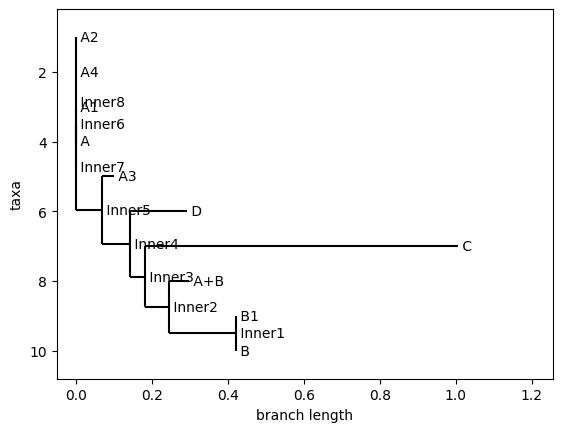

 , A2
 |
 | A4
_|
 , A1
 |
 | A
 |
 |    __ A3
 |___|
     |      _________ D
     |_____|
           |   __________________________________________________________ C
           |__|
              |    ___ A+B
              |___|
                  |            , B1
                  |____________|
                               | B



In [7]:
from Bio.Phylo import PhyloXML
import matplotlib
# useful functions of phylo
# https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-13-209/tables/1


tree_phy = njtree.as_phyloxml()
Phylo.write(tree_phy, "result/tree_res.xml","phyloxml")

#tree = Phylo.parse('result/tree_res.xml', 'phyloxml').next()
tree = Phylo.read("result/tree_res.xml", "phyloxml")
tree.ladderize()  # Flip branches so deeper clades are displayed at top


Phylo.draw(tree)
Phylo.draw_ascii(tree)




In [11]:
# import pygraphviz
# import graphviz

# Phylo.draw_graphviz(tree)
# pylab.show()